### Week 8 Final Project

Author: Peter La

Title: An In-Depth Analysis of a Stroke Dataset

Date: March 11, 2025

Author: Peter la

Purpose: Conduct Exploratory Data Analysis (EDA) and advanced data visualization of the given stroke dataset.

Input: stroke_data.csv (clean)

Outputs:
heatmap.png
<br/>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;scatterplot.png
<br/>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;boxplot.png
<br/>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;histogram.png
<br/>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;decision.png
<br/>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;networkgraph.png         

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [2]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns;

warnings.filterwarnings("ignore")
%matplotlib inline
dpi = 300
sns.set()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

Import Dataset

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/msds670/stroke_data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
909,10762,Female,41,0,0,Yes,Private,Rural,79.85,45.0,Unknown,0
931,22902,Male,41,1,0,Yes,Private,Urban,69.52,31.9,never smoked,0
2149,6239,Female,14,0,0,No,Private,Rural,233.71,22.9,never smoked,0
3306,46895,Male,60,0,0,Yes,Private,Rural,62.61,30.7,never smoked,0
580,13517,Male,59,0,0,Yes,Private,Urban,100.54,35.8,never smoked,0
1024,35231,Male,62,0,0,Yes,Govt_job,Urban,91.68,26.5,Unknown,0
3150,26076,Female,75,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
3358,59540,Female,19,0,0,No,Private,Rural,56.85,21.1,never smoked,0
1430,12915,Female,66,0,0,Yes,Govt_job,Rural,85.52,30.0,never smoked,0
1831,15873,Male,70,0,0,Yes,Private,Rural,72.56,30.4,formerly smoked,0


EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4423 entries, 0 to 4422
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4423 non-null   int64  
 1   gender             4423 non-null   object 
 2   age                4423 non-null   int64  
 3   hypertension       4423 non-null   int64  
 4   heart_disease      4423 non-null   int64  
 5   ever_married       4423 non-null   object 
 6   work_type          4423 non-null   object 
 7   residence_type     4423 non-null   object 
 8   avg_glucose_level  4423 non-null   float64
 9   bmi                4423 non-null   float64
 10  smoking_status     4423 non-null   object 
 11  stroke             4423 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 414.8+ KB


In [6]:
df = df.drop('id', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4423 entries, 0 to 4422
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4423 non-null   object 
 1   age                4423 non-null   int64  
 2   hypertension       4423 non-null   int64  
 3   heart_disease      4423 non-null   int64  
 4   ever_married       4423 non-null   object 
 5   work_type          4423 non-null   object 
 6   residence_type     4423 non-null   object 
 7   avg_glucose_level  4423 non-null   float64
 8   bmi                4423 non-null   float64
 9   smoking_status     4423 non-null   object 
 10  stroke             4423 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 380.2+ KB


In [8]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [9]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.397016,48.878137,0.112593,0.062175,0.758083,1.883111,0.508478,107.972336,29.028126,1.603663,0.055844
std,0.489797,18.707171,0.316131,0.241500,0.428293,0.877964,0.499985,47.266881,9.399514,1.027463,0.229647
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.445000,24.700000,1.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.150000,28.700000,2.000000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,2.000000,1.000000,115.885000,33.700000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,97.600000,4.000000,1.000000


In [11]:
df.to_csv('/content/drive/MyDrive/msds670/prepped_stroke_data.csv', index=False)

In [12]:
path = '/content/drive/MyDrive/msds670/'

Plot Visualizations

In [13]:
correlation_matrix = df.corr()
correlation_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.039711,0.035470,0.100984,0.022430,-0.003546,-0.012825,0.070335,-0.016970,-0.011698,0.019979
age,0.039711,1.000000,0.254545,0.269126,0.517097,0.101380,0.018812,0.231026,-0.004637,0.000546,0.251412
hypertension,0.035470,0.254545,1.000000,0.097858,0.112698,0.045799,-0.008902,0.167443,0.033752,0.071973,0.118959
heart_disease,0.100984,0.269126,0.097858,1.000000,0.077676,0.043883,0.002188,0.158621,-0.064280,0.039183,0.129026
ever_married,0.022430,0.517097,0.112698,0.077676,1.000000,0.012587,0.006412,0.122029,0.085075,0.034389,0.075307
work_type,-0.003546,0.101380,0.045799,0.043883,0.012587,1.000000,-0.008303,0.023665,-0.016389,-0.019781,0.031261
residence_type,-0.012825,0.018812,-0.008902,0.002188,0.006412,-0.008303,1.000000,0.000157,-0.005936,0.016447,0.016556
avg_glucose_level,0.070335,0.231026,0.167443,0.158621,0.122029,0.023665,0.000157,1.000000,0.052944,0.040440,0.129297
bmi,-0.016970,-0.004637,0.033752,-0.064280,0.085075,-0.016389,-0.005936,0.052944,1.000000,-0.105580,-0.087201
smoking_status,-0.011698,0.000546,0.071973,0.039183,0.034389,-0.019781,0.016447,0.040440,-0.105580,1.000000,0.045904


In [32]:
plt.style.use('default')

In [33]:
# Create mask for upper right of triangle
mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype=bool))

In [34]:
# Create correlation heatmap for input variables
corr_min = -1
corr_max = 1

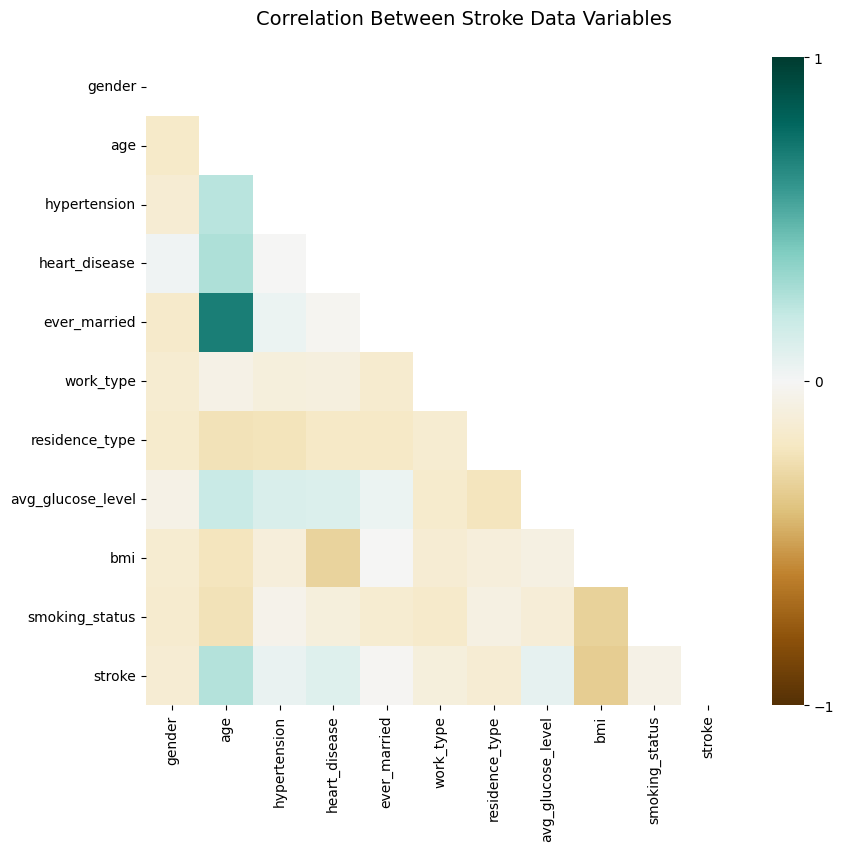

In [35]:
# Plotting

fig, ax = plt.subplots(figsize=(9.5, 8))

ax.grid(False)

sns.heatmap(correlation_matrix.corr(),
            vmin=corr_min,
            vmax=corr_max,
            cmap='BrBG',
            cbar_kws={"ticks": [-1, 0, 1]},
            mask=mask,
            ax=ax)

fig.suptitle('Correlation Between Stroke Data Variables', x=.46, fontsize=14)

plt.subplots_adjust(top=.92)
plt.show()

In [36]:
plot1_filename = 'heatmap.png'
fig.savefig(path + plot1_filename, dpi=dpi)

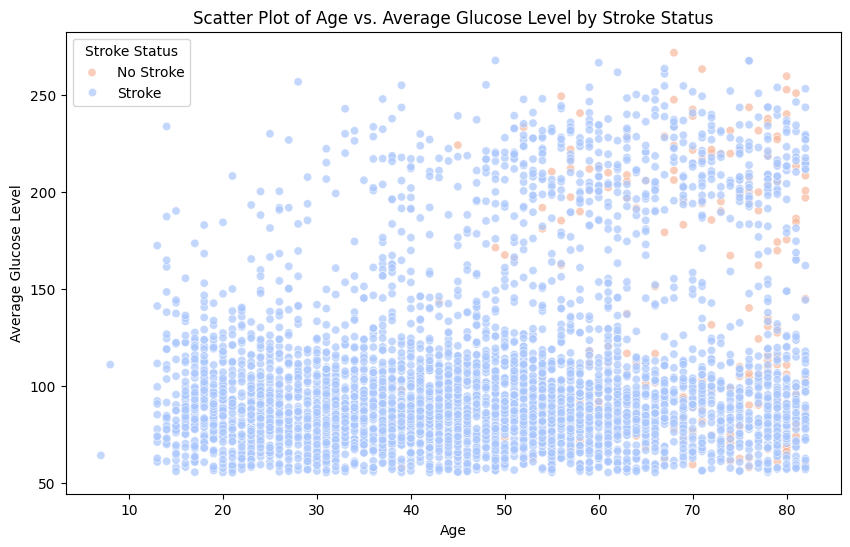

In [37]:
# Scatter plot using fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot using seaborn
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7, ax=ax)

# Title and labels
ax.set_title('Scatter Plot of Age vs. Average Glucose Level by Stroke Status')
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')

# Customize legend
legend_labels = ['No Stroke', 'Stroke']
ax.legend(title='Stroke Status', labels=legend_labels)

# Display the plot
plt.show()


In [38]:
plot2_filename = 'scatterplot.png'
fig.savefig(path + plot2_filename, dpi=dpi)

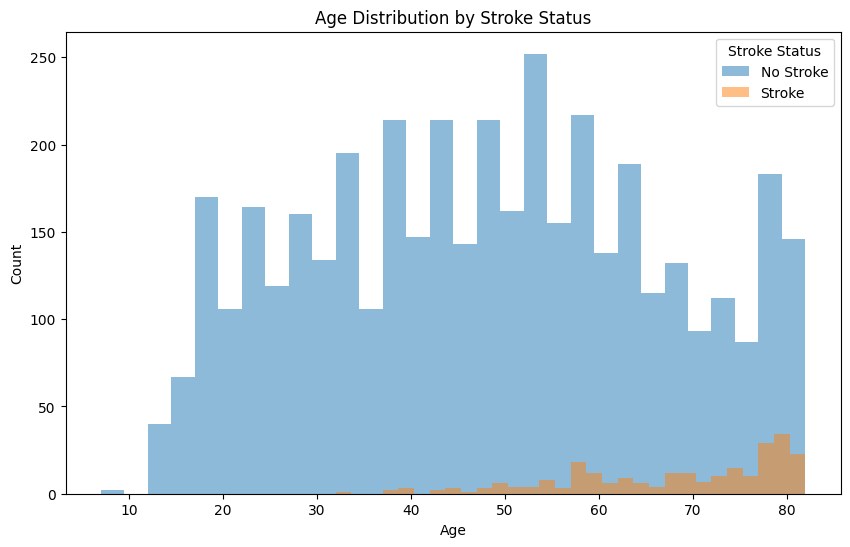

In [39]:
# Plotting Age Distribution by Stroke Status using histograms
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each stroke status
df[df['stroke'] == 0]['age'].plot(kind='hist', bins=30, alpha=0.5, ax=ax, label='No Stroke')
df[df['stroke'] == 1]['age'].plot(kind='hist', bins=30, alpha=0.5, ax=ax, label='Stroke')

# Title and labels
ax.set_title('Age Distribution by Stroke Status')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Legend
ax.legend(title='Stroke Status')

# Display the plot
plt.show()


In [40]:
plot3_filename = 'histogram.png'
fig.savefig(path + plot3_filename, dpi=dpi)

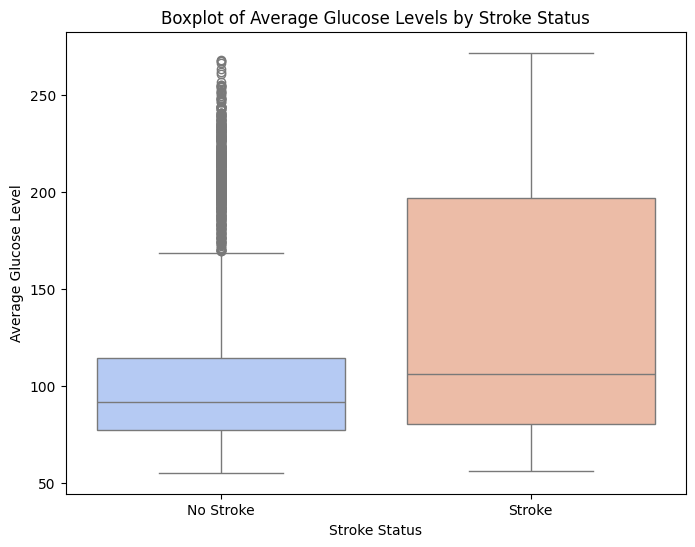

In [41]:
# Boxplot for Average Glucose Levels by Stroke Status
fig, ax = plt.subplots(figsize=(8, 6))

# Boxplot using seaborn
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='coolwarm', ax=ax)

# Title and labels
ax.set_title('Boxplot of Average Glucose Levels by Stroke Status')
ax.set_xlabel('Stroke Status')
ax.set_ylabel('Average Glucose Level')
ax.set_xticklabels(['No Stroke', 'Stroke'])

# Display the plot
plt.show()


In [42]:
plot4_filename = 'boxplot.png'
fig.savefig(path + plot4_filename, dpi=dpi)

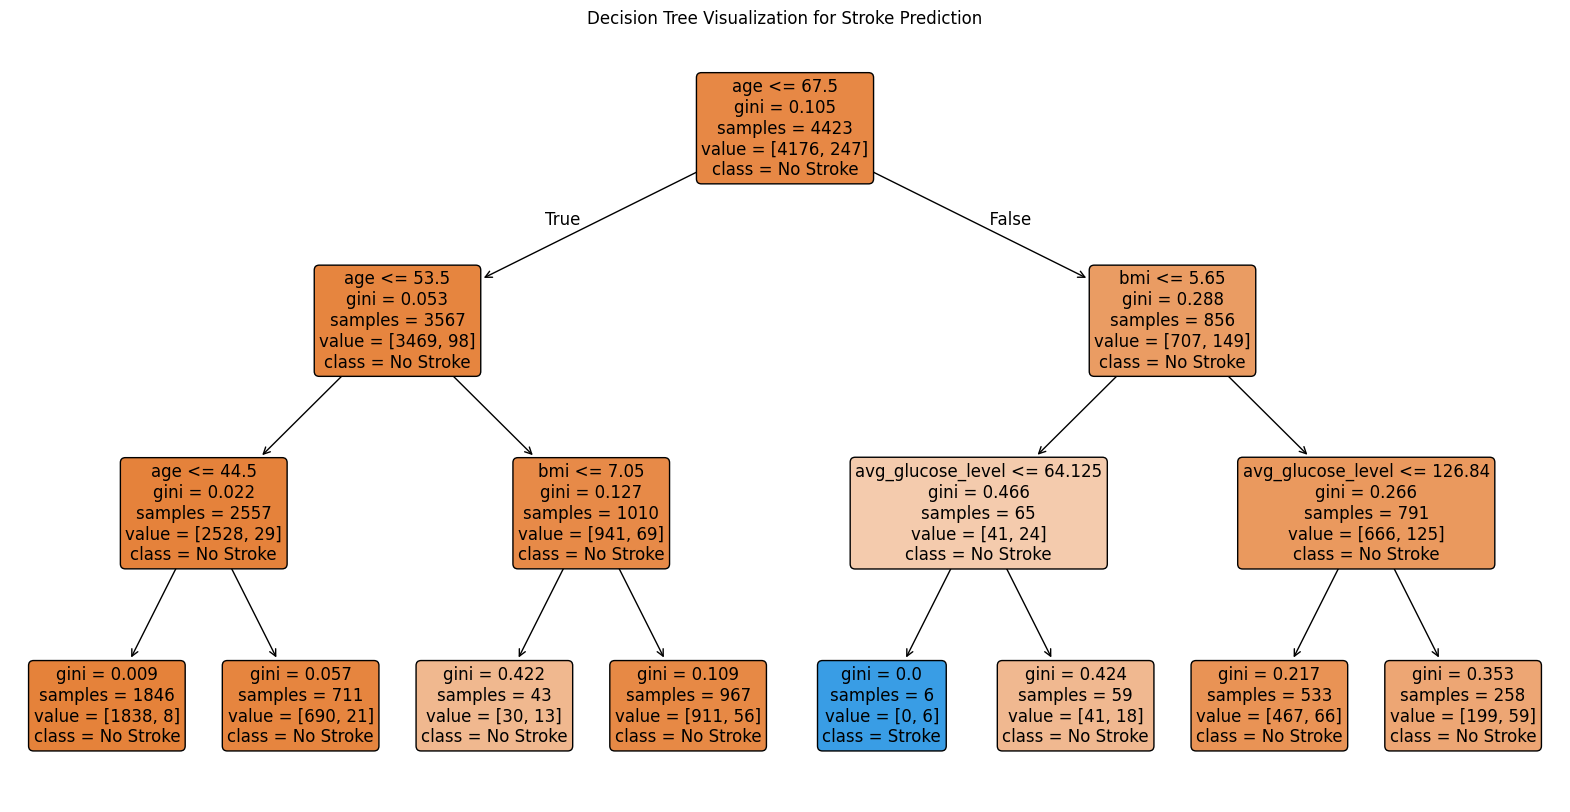

In [43]:
# Import libary
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Split features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Initialize and train a simple decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X, y)

# Plotting the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Stroke', 'Stroke'],
          filled=True, rounded=True, fontsize=12, ax=ax)

plt.title('Decision Tree Visualization for Stroke Prediction')
plt.show()

In [44]:
plot5_filename = 'decisiontree.png'
fig.savefig(path + plot5_filename, dpi=dpi)

In [45]:
# Import library
import networkx as nx

# Initialize a graph
G = nx.Graph()

In [46]:
# Load the original dataset
df2 = pd.read_csv(r'/content/drive/MyDrive/msds670/stroke_data.csv')

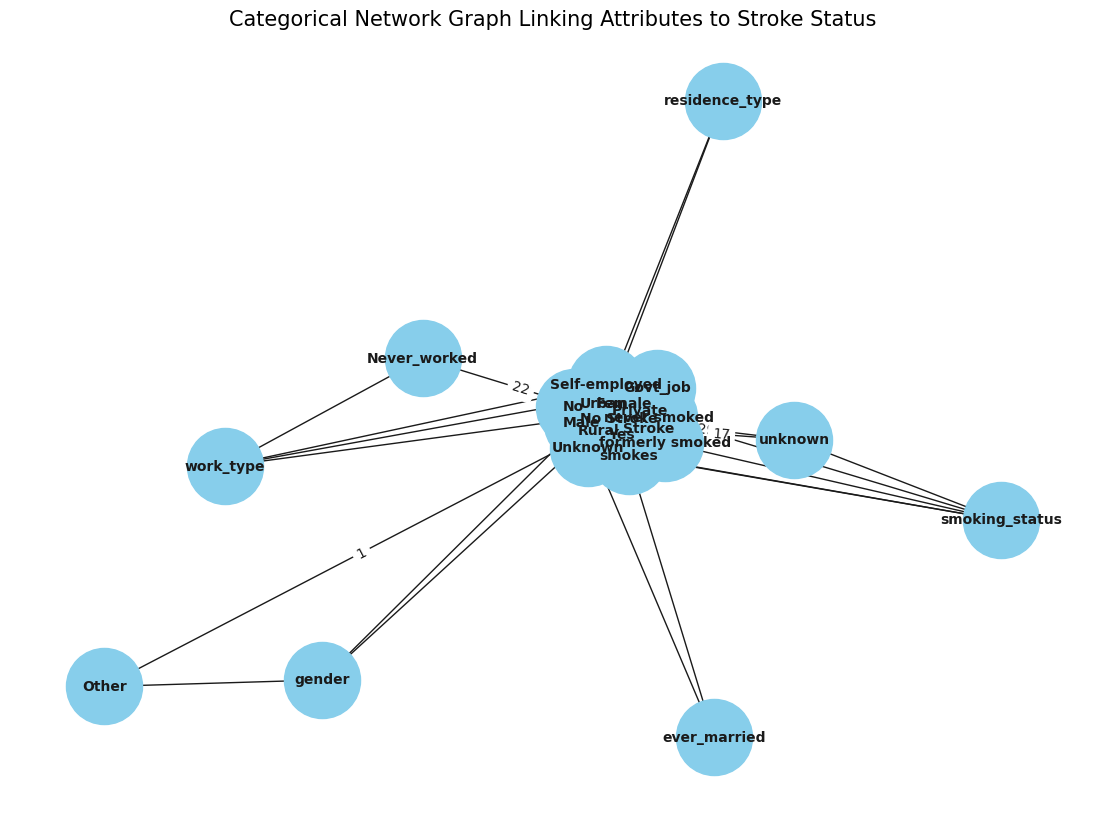

In [47]:
# Defining categorical features and target
categorical_features = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
target_feature = 'stroke'

# Adding edges between categories and the stroke status
for feature in categorical_features:
    for category in df2[feature].unique():
        # Connect each category to the feature name
        G.add_edge(feature, category)
        # Connect category to stroke status based on occurrence
        stroke_counts = df2[df2[feature] == category][target_feature].value_counts()
        for stroke_status in stroke_counts.index:
            stroke_label = 'Stroke' if stroke_status == 1 else 'No Stroke'
            G.add_edge(category, stroke_label, weight=stroke_counts[stroke_status])

# Plotting the network graph
fig, ax = plt.subplots(figsize=(14, 10))

# Positioning nodes with spring layout
pos = nx.spring_layout(G, k=0.8)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Set title
ax.set_title('Categorical Network Graph Linking Attributes to Stroke Status', fontsize=15)

# Display the plot
plt.show()

In [48]:
plot6_filename = 'networkgraph.png'
fig.savefig(path + plot6_filename, dpi=dpi)